### Importação dos dados



In [15]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

lojas = [loja1,loja2,loja3,loja4]
lojas_nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [16]:
faturamentos = [loja['Preço'].sum() for loja in lojas]
for i,faturamento in enumerate(faturamentos,start=1):
    print(f"Faturamento total da loja {i}: R$ {faturamento:,.2f}")

Faturamento total da loja 1: R$ 1,534,509.12
Faturamento total da loja 2: R$ 1,488,459.06
Faturamento total da loja 3: R$ 1,464,025.03
Faturamento total da loja 4: R$ 1,384,497.58


# 2. Vendas por Categoria


In [17]:
venda_categoria = {}
for i, loja in enumerate(lojas,start=1):
    venda_categoria[f'loja{i}'] = loja.groupby("Categoria do Produto").size()
venda_categoria_df = pd.DataFrame(venda_categoria)
venda_categoria_df


,loja1,loja2,loja3,loja4
Categoria do Produto,,,,
brinquedos,324,313,315,338
eletrodomesticos,312,305,278,254
eletronicos,448,422,451,451
esporte e lazer,284,275,277,277
instrumentos musicais,182,224,177,170
livros,173,197,185,187
moveis,465,442,499,480
utilidades domesticas,171,181,177,201


# 3. Média de Avaliação das Lojas

In [18]:
media_avaliacao = [loja['Avaliação da compra'].mean() for loja in lojas]
for i, media in enumerate(media_avaliacao,start=1):
    print(f"Média de avaliação da loja {i}: {media:.2f}")

Média de avaliação da loja 1: 3.98
Média de avaliação da loja 2: 4.04
Média de avaliação da loja 3: 4.05
Média de avaliação da loja 4: 4.00


# 4. Produtos Mais e Menos Vendidos

In [19]:
# Verificando os produtos que venderam o maior número de quantidade
mais_vendido = {}
menos_vendido = {}

for i, loja in enumerate(lojas,start=1):
    contagem = loja['Produto'].value_counts()

    max_vendas = contagem.iloc[0]
    min_vendas = contagem.iloc[-1]

    mais = contagem[contagem == max_vendas].index.to_list()
    menos = contagem[contagem == min_vendas].index.to_list()

    mais_vendido[f'loja {i}'] = mais, max_vendas
    menos_vendido[f'loja {i}'] = menos, min_vendas

for loja in mais_vendido:

    produtos_mais, qtd_mais = mais_vendido[loja]
    produtos_menos,qtd_menos = menos_vendido[loja]

    print(f"Na {loja}, o(s) produto(s) mais vendido(s): {produtos_mais},com {qtd_mais} unidades vendidas.\n Já o(s) menos vendido(s): {produtos_menos}, com {qtd_menos} unidades.\n")

Na loja 1, o(s) produto(s) mais vendido(s): ['Micro-ondas', 'TV Led UHD 4K', 'Guarda roupas'],com 60 unidades vendidas.
 Já o(s) menos vendido(s): ['Headset', 'Celular ABXY'], com 33 unidades.

Na loja 2, o(s) produto(s) mais vendido(s): ['Iniciando em programação'],com 65 unidades vendidas.
 Já o(s) menos vendido(s): ['Jogo de tabuleiro'], com 32 unidades.

Na loja 3, o(s) produto(s) mais vendido(s): ['Kit banquetas'],com 57 unidades vendidas.
 Já o(s) menos vendido(s): ['Blocos de montar'], com 35 unidades.

Na loja 4, o(s) produto(s) mais vendido(s): ['Cama box'],com 62 unidades vendidas.
 Já o(s) menos vendido(s): ['Guitarra'], com 33 unidades.



In [20]:
# Receita dos produtos que tiveram maior quantidade de unidades vendidas
for i,loja in enumerate(lojas):
    vendas = loja.groupby(['Produto'])['Preço'].sum()
    vendas = vendas.sort_values(ascending=False)
    for j in range(len(mais_vendido[f'loja {i+1}'][0])):
        produto = mais_vendido[f'loja {i+1}'][0][j]
        receita = vendas.loc[produto]
        print(f'receita loja {i+1} {produto}:R$ {receita}')

receita loja 1 Micro-ondas:R$ 46348.89
receita loja 1 TV Led UHD 4K:R$ 189534.28
receita loja 1 Guarda roupas:R$ 39282.78
receita loja 2 Iniciando em programação:R$ 4169.96
receita loja 3 Kit banquetas:R$ 22265.96
receita loja 4 Cama box:R$ 43928.57


In [21]:
# Receita dos produtos que tiveram menor quantidade de unidades vendidas
for i,loja in enumerate(lojas):
    vendas = loja.groupby(['Produto'])['Preço'].sum()
    vendas = vendas.sort_values(ascending=False)
    for j in range(len(menos_vendido[f'loja {i+1}'][0])):
        produto = menos_vendido[f'loja {i+1}'][0][j]
        receita = vendas.loc[produto]
        print(f'receita loja {i+1} {produto}:R$ {receita}')

receita loja 1 Headset:R$ 6307.71
receita loja 1 Celular ABXY:R$ 43534.47
receita loja 2 Jogo de tabuleiro:R$ 7749.58
receita loja 3 Blocos de montar:R$ 1649.81
receita loja 4 Guitarra:R$ 34430.67


# 5. Frete Médio por Loja


In [22]:
frete_medio = {}

for i, loja in enumerate(lojas,start=1):
    frete_medio[f'loja {i}'] = round(loja["Frete"].mean(),2)
pd.Series(frete_medio)

,0
loja 1,34.69
loja 2,33.62
loja 3,33.07
loja 4,31.28


Através da análise inicial dos dados, podemos ver que a Loja 1 apesar de ter o maior faturamento das quatro lojas (`R$ 1.534.509,12`) também possui a menor avaliação média do público (`3,98/5`). Porém essa desaprovação talvez seja devido ao alto valor do frete, já que se trata também da loja com o maior frete médio (`R$ 34,69`).

Agora se olharmos para loja 4 podemos notar que possui o menor frete médio (`R$ 31,28`) e ainda sim possui a segunda maior dessatisfação sendo de `4/5`, além de ser a loja com menor número de faturamento por um valor considerável entre as 4 lojas (`R$ 1,384,497.58`).

Possivelmente a loja 4 é a loja menos eficiente, vamos para análise gráfica averiguar se nossa hipótese se solidifica.

# 6. Visualização gráfica

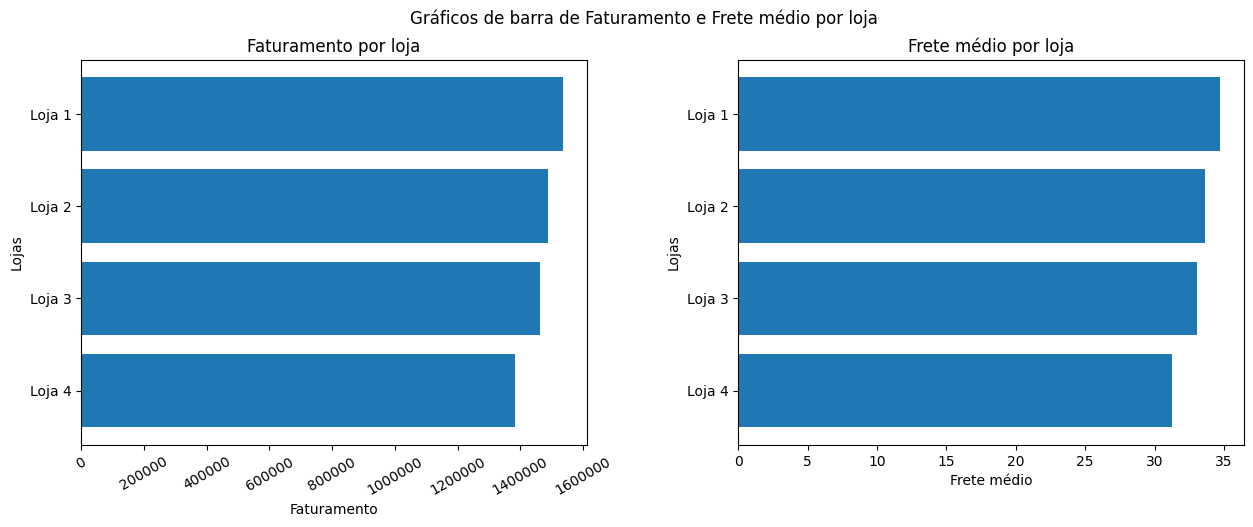

In [23]:
# Gráfico de barras de faturamento por loja e frete médio por loja
df_frete_medio = pd.Series(frete_medio)
fretes = df_frete_medio.values.tolist()

fig, axs = plt.subplots(1,2,figsize=(15,5))
fig.subplots_adjust(hspace=0.5,wspace=0.3)
fig.suptitle('Gráficos de barra de Faturamento e Frete médio por loja')

axs[0].barh(lojas_nomes,faturamentos)
axs[0].set_title('Faturamento por loja')
axs[0].set_xlabel('Faturamento')
axs[0].ticklabel_format(style='plain',axis='x')
axs[0].tick_params('x',rotation=30)

axs[1].barh(lojas_nomes,fretes)
axs[1].set_title('Frete médio por loja')
axs[1].set_xlabel('Frete médio')

for ax in axs.flat:
    ax.invert_yaxis()
    ax.set_ylabel('Lojas')

plt.show()

Através do gráfico, podemos observar que possivelmente o frete médio está diretamente ligado ao faturamento da loja, talvez em relação a produtos mais caros ou mais pesados ou a quantidade de venda ao longo do tempo. Porém a Loja 4 possui uma diferença visível em relação as 3 lojas.

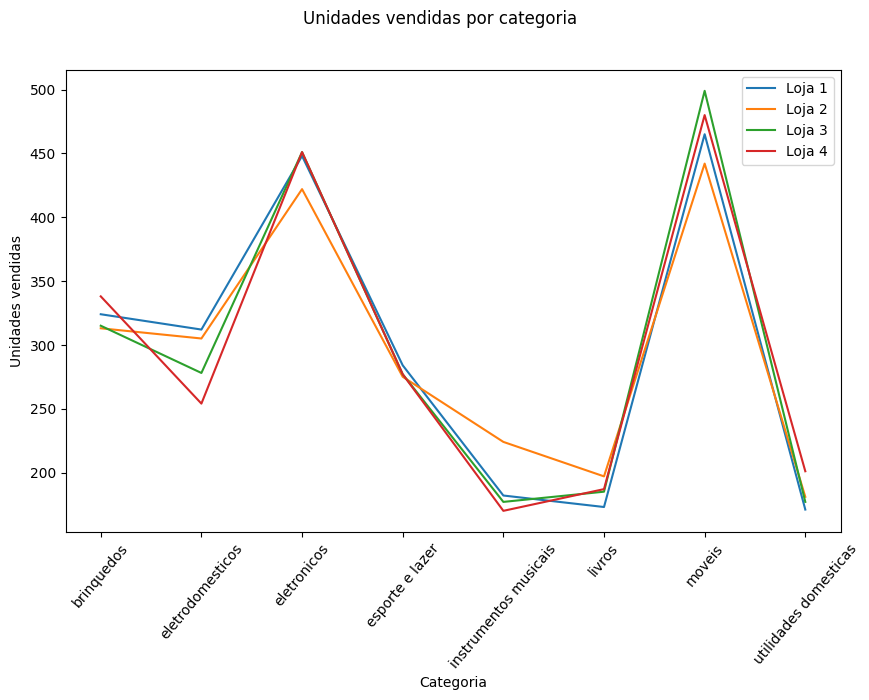

In [24]:
# Gráfico de linhas para verificar tendência de venda por categoria em cada loja
categorias = venda_categoria_df.index.tolist()

fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle('Unidades vendidas por categoria')

ax.plot(categorias,venda_categoria['loja1'],label='Loja 1')
ax.plot(categorias,venda_categoria['loja2'],label='Loja 2')
ax.plot(categorias,venda_categoria['loja3'],label='Loja 3')
ax.plot(categorias,venda_categoria['loja4'],label='Loja 4')

ax.legend()
ax.tick_params('x',rotation=50)
ax.set_xlabel('Categoria')
ax.set_ylabel('Unidades vendidas')

plt.show()

Através do gráfico de linhas das unidades vendidas por categoria podemos ver em relação a maioria das categorias as 4 lojas possuem muitas similaridades, porém a loja 4 possui um baixo rendimento em eletrodomésticos e instrutmentos musicais bem discrepante das outras, além de não compensar em nenhuma outra categoria.

Por exemplo, na loja 2 vemos que possui uma baixa em eletrônicos, mas compensa em instrumentos musicais e livros.

In [25]:
# Colocando a coluna 'Data da Compra em formato de data (datetime)
for loja in lojas:
    loja['Data da Compra'] = pd.to_datetime(loja['Data da Compra'],dayfirst=True)

In [26]:
# Fazendo a soma das receitas agrupado por dia da compra
soma_receita = []
for loja in lojas:
    soma_receita.append(loja.groupby(['Data da Compra'])['Preço'].sum())

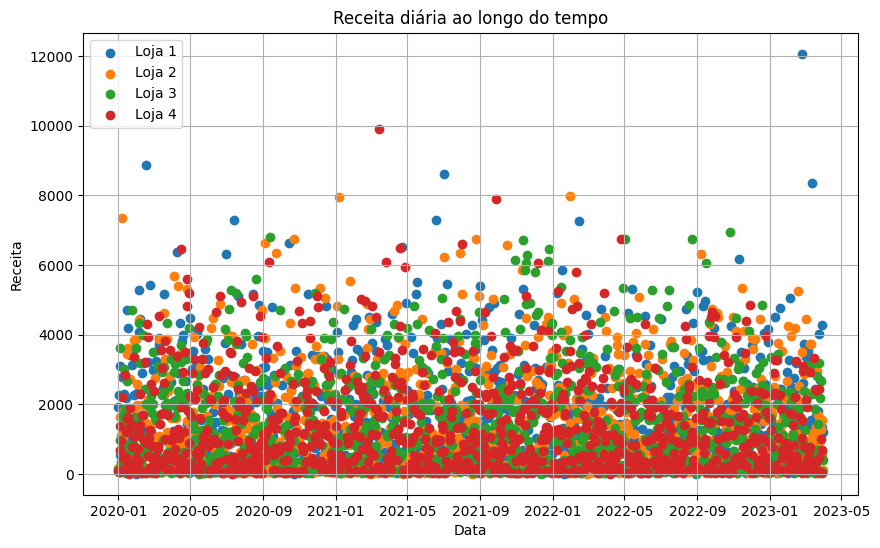

In [27]:
# Gráfico de dispersão de Receita diária
fig, ax = plt.subplots(figsize=(10,6))

ax.set_title('Receita diária ao longo do tempo')

ax.scatter(soma_receita[0].index.tolist(),soma_receita[0].values.tolist(), label='Loja 1')
ax.scatter(soma_receita[1].index.tolist(),soma_receita[1].values.tolist(), label='Loja 2')
ax.scatter(soma_receita[2].index.tolist(),soma_receita[2].values.tolist(), label='Loja 3')
ax.scatter(soma_receita[3].index.tolist(),soma_receita[3].values.tolist(), label='Loja 4')

ax.set_xlabel('Data')
ax.set_ylabel('Receita')

ax.legend()
ax.grid()

plt.show()

Pelo gráfico de dispersão, podemos notar que as vendas diárias da loja 4 se concentra muito abaixo de 2000 como receita, tendo muitos dias inferiores a outras lojas.

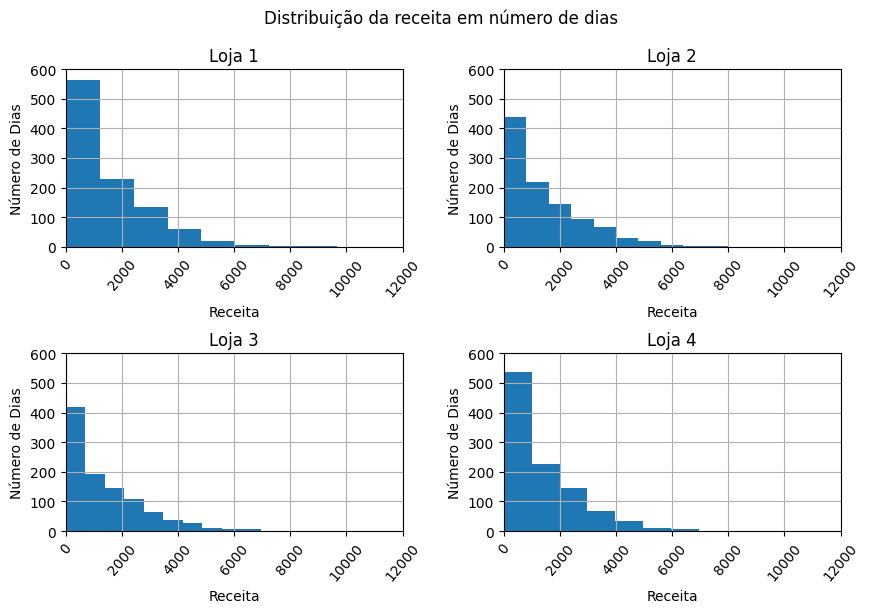

In [28]:
# Histograma para avaliar a distribuição em número de dias
fig, axs = plt.subplots(2,2,figsize=(10,6))
fig.subplots_adjust(hspace=0.6,wspace=0.3)
fig.suptitle('Distribuição da receita em número de dias')

axs[0,0].hist(soma_receita[0])
axs[0,0].set_title('Loja 1')

axs[0,1].hist(soma_receita[1])
axs[0,1].set_title('Loja 2')

axs[1,0].hist(soma_receita[2])
axs[1,0].set_title('Loja 3')

axs[1,1].hist(soma_receita[3])
axs[1,1].set_title('Loja 4')

for ax in axs.flat:
    ax.set_xlabel('Receita')
    ax.set_ylabel('Número de Dias')
    ax.tick_params('x',rotation=50)
    ax.grid()

xmax = 12000
ymax = 600
for ax in axs.ravel():
    ax.set_xlim(0,xmax)
    ax.set_ylim(0,ymax)
plt.show()

O histograma nos ajuda a visualizar melhor a informação tirada do gráfico de dispersão, podemos ver que a loja 4 possui muitos dias com receita menor que 2000.

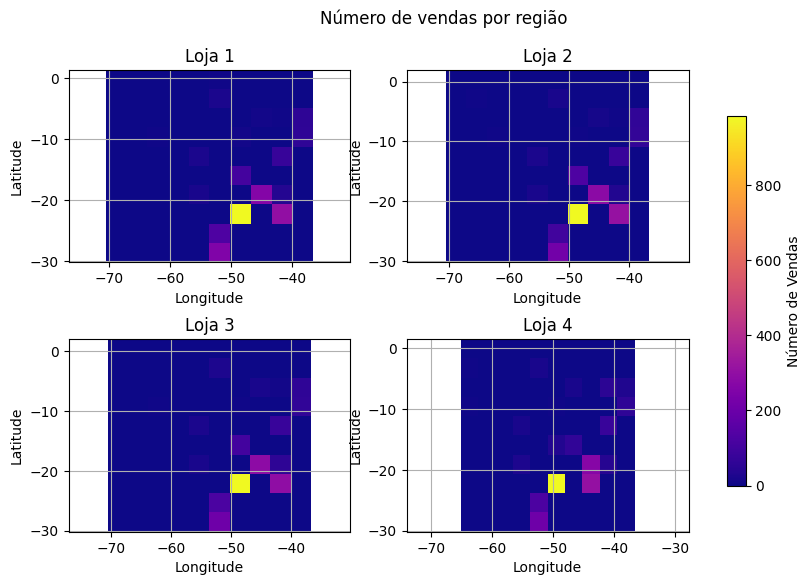

In [30]:
# Mapa de calor de Longitude e Latitude dos clientes de cada loja
fig, axs = plt.subplots(2,2,figsize=(10,6))
fig.subplots_adjust(hspace=0.4,wspace=0.2)
fig.suptitle('Número de vendas por região')

imgs = []

imgs.append(axs[0, 0].hist2d(loja1['lon'], loja1['lat'], cmap='plasma')[3])
imgs.append(axs[0, 1].hist2d(loja2['lon'], loja2['lat'], cmap='plasma')[3])
imgs.append(axs[1, 0].hist2d(loja3['lon'], loja3['lat'], cmap='plasma')[3])
imgs.append(axs[1, 1].hist2d(loja4['lon'], loja4['lat'], cmap='plasma')[3])

for i, ax in enumerate(axs.flat):
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'Loja {i+1}')
    ax.axis('equal')
    ax.grid()

cbar = fig.colorbar(imgs[0], ax=axs, orientation='vertical', shrink=0.8, label='Número de Vendas')
plt.show()

Para finalizar, temos também o gráfico de calor a cima, que nos dá a informação de que todas as lojas possuem uma concentração similar de vendas, já a loja 4 porém a loja 4 possui uma diferença em relação as demais nas coordenadas na área, principalmente por volta de (-45,-23) e (-40,-18), o que mostra que naquela região possui um desempenho a baixo em relação as outras lojas.

# 7. Conclusão

Feita todas as análises e através da visualização de dados, podemos concluir que a loja 4 é a que possui um menor desempenho, tendo um faturamento muito inferior as outras lojas. além de que podemos notar que será a loja que terá o menor impacto com sua venda, pois não possui nenhuma categoria que se sobressaia em relação as outras lojas, possui pequena diferença demográfica e pouco desempenho em diversas regiões. Além de possuir a pior distribuição de receita no tempo.